In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def poisson(tmax,lam):

    L=[]
    t=0

    while True:
        t+=np.random.exponential(lam)
        if t>=tmax:
            break
        L.append(t)
        
    return np.array(L)

In [3]:
pa1=poisson(60,10)
pd1=poisson(60,15)

In [4]:
def tabPeriodUntil(tempsMax,dt):
    
    L=[]
    t=0
    
    while t<=tempsMax-dt:
        t+=dt
        L.append(t)
    
    return np.array(L)

In [5]:
pa2 = tabPeriodUntil(60*5,10)
pd2 =tabPeriodUntil(60*5,15)

In [6]:
def plotprocess(p, label=None):
    x = np.concatenate(([0.0], p))
    y = np.arange(0,len(x))
    plt.step(x,y,where = "post", label=label)
    plt.xlabel("time(s)")
    plt.ylabel("number of clients")

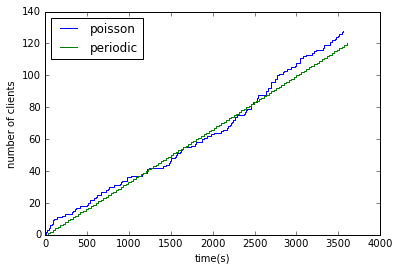

In [7]:
p1=poisson(60*60,30)
p2 = tabPeriodUntil(60*60,30)
plotprocess(p1, label="poisson")
plotprocess(p2, label="periodic")
plt.legend(loc='upper left')
plt.show()

In [8]:
pa1,pd1


(array([  6.54484089,   6.86208659,   8.88315886,  10.67910579,
         13.80421448,  22.95681383,  53.18646719]),
 array([  0.57200621,  12.15566808,  18.57472245,  47.29991689]))

In [9]:
tmax = 60
lama = 10
lamd = 15
a=poisson(tmax,lama)
b=poisson(tmax,lamd)

In [10]:
b

array([ 14.92121521,  21.61789567,  24.02045797])

In [11]:
def nb_clients(tmax,lama,lamd):
    i=0
    j=0
    a=poisson(tmax,lama)
    b=poisson(tmax,lamd)
    clients=0
    L=[]
    while i<len(a) and j<len(b):
        if a[i]<b[j]:
            clients+=1
            L.append((clients,a[i]))
            i=i+1
        else:
            if clients > 0:
                clients-=1
                L.append((clients,b[j]))
            j=j+1

    clients=clients+len(a)-len(b)
    L.append((clients,tmax))
    
    return L,a,b

In [12]:
nb_clients(60,10,15)

([(1, 1.1369117598500316),
  (2, 1.8075769795942422),
  (3, 11.327790750914271),
  (2, 11.867480475905873),
  (1, 15.228662326259933),
  (0, 17.969220966250287),
  (1, 19.404092872072106),
  (2, 21.517764869358306),
  (1, 21.820632897929634),
  (2, 24.311402262861716),
  (1, 31.363216808258457),
  (2, 31.567918548377779),
  (3, 34.38487758206638),
  (4, 45.628524469408752),
  (3, 46.594657448247098),
  (8, 60)],
 array([  1.13691176,   1.80757698,  11.32779075,  19.40409287,
         21.51776487,  24.31140226,  31.56791855,  34.38487758,
         45.62852447,  54.62593755,  55.9517951 ]),
 array([ 11.86748048,  15.22866233,  17.96922097,  21.8206329 ,
         31.36321681,  46.59465745]))

In [13]:
def splitProcess(tmax,lama,lamd,nbpers):
    
    lTmps = []
    lPers = []
    bta = False
    btd = False
    ta = np.random.exponential(lama)
    cpt = nbpers
   
    if nbpers == 0:
        td = 0
        
    else :
        td = np.random.exponential(lamd)
        
    while ta <tmax and td < tmax  :
        
        
        if cpt == 0:
            lTmps.append(ta)
            cpt+=1
            lPers.append(cpt)
        
        elif ta>td:
            lTmps.append(td)
            cpt-=1
            lPers.append(cpt)
            bta = True
            
        
        else:
            lTmps.append(ta)
            cpt+=1
            lPers.append(cpt) 
            btd = True
        
        if bta:
            td += np.random.exponential(lamd)
            bta = False
        
        if btd:
            ta += np.random.exponential(lama)
            btd = False
                    
    return lTmps,lPers   
        
            
    

    

In [14]:
splitProcess(60,10,15,0)   

([8.037448518948018,
  0,
  8.037448518948018,
  1.411408226118186,
  8.037448518948018,
  3.1693485418741454,
  8.037448518948018,
  8.037448518948018,
  19.267395716985032,
  35.839488671772294,
  36.38012619630523,
  39.84590380868554,
  49.856228183131854,
  51.624654571235865],
 [1, 0, 1, 0, 1, 0, 1, 2, 3, 4, 3, 4, 3, 4])

In [15]:
def addProcess2(tmax,lama,lamd,nbpers):
    
    lTmps = []
    lPers = []
    t = 0.0  # temps du derniere evenement 
    dta = None
    dtd = None
    cpt = nbpers

    while True:
        
        if cpt == 0:
            if dta is None:
                dta = np.random.exponential(lama)
            t += dta            
            cpt += 1
            dta = None
        else:
            if dta is None:
                dta = np.random.exponential(lama)
            if dtd is None:
                dtd = np.random.exponential(lamd)
            
            if dta < dtd:
                t += dta
                dtd -= dta
                cpt += 1
                dta = None
            else:
                t += dtd
                dta -= dtd
                cpt -= 1
                dtd = None
            
        if t > tmax:
            break

        lTmps.append(t)
        lPers.append(cpt)

    return lTmps,lPers   

In [39]:
lt,lp = addProcess2(1800,6,5,0)

In [31]:
def plotprocess(lt,lp,b):
    lt = np.concatenate(([0.0], lt))
    lp = np.concatenate(([b], lp))
    plt.step(lt,lp,where = "post")
    plt.xlabel("time(s)")
    plt.ylabel("number of clients")

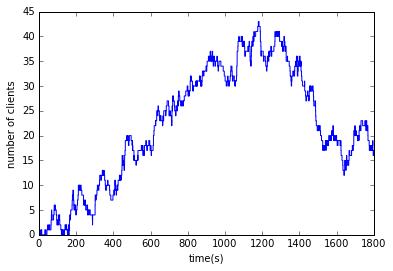

In [45]:
lt,lp = addProcess2(1800,6,5,0)
plotprocess(lt,lp,0)

In [ ]:
def addProcess_MS(tmax,lama,lamd,nbpers,nbService,l_lamService):
    
    lTmps = []
    lPers = []
    t = 0.0  # temps du derniere evenement 
    dta = None
    dtd = None
    cpt = nbpers
    temps_service = []

    while True:
        
        if cpt == 0:
            if dta is None:
                dta = np.random.exponential(lama)
            t += dta            
            cpt += 1
            dta = None
        else:
            if dta is None:
                dta = np.random.exponential(lama)
            if dtd is None:
                dtd = np.random.exponential(lamd)
            
            if dta < dtd:
                t += dta
                dtd -= dta
                cpt += 1
                dta = None
            else:
                
  
                t += dtd
                dta -= dtd
                cpt -= 1
                dtd = None
            
        if t > tmax:
            break

        lTmps.append(t)
        lPers.append(cpt)

    return lTmps,lPers   

In [48]:
def testService(nbService,l_Service):
    
    ltemps = []
    
    for i in l_Service:
        ltemps.append(np.random.exponential(i))
        
    np.sort(ltemps)
    
    return ltemps

In [49]:
l = testService(2,[5,10])

In [50]:
l

[4.491131647726963, 6.537829763008483]